In [1]:
# Import libraries for text processing and NLP
import nltk
import re
import spacy




# Import libraries for data manipulation
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Import library for word frequency analysis
from collections import Counter



# Optional: Ignore warnings for clean output
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

C:\Users\shiva\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


All libraries imported successfully!


In [2]:
!python -m spacy download en_core_web_sm

     --------------------------------------- 12.8/12.8 MB 25.2 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
# Ensure NLTK resources are available
nltk.download('punkt')  # Tokenizer models
nltk.download('stopwords')  # Stopwords for text cleaning
nltk.download('averaged_perceptron_tagger')  # POS tagger model

# Load spaCy's English language model
import spacy
nlp = spacy.load('en_core_web_sm')  # Load the small English model
import os

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## 1 Load Data

In [4]:
directory   = "C:/Users/shiva/Downloads/AT1 dataset_AusRadioTalkback/AT1 dataset_AusRadioTalkback"

In [5]:
# Initialize an empty list to store data
data = []

# Loop through all text files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        filepath = os.path.join(directory, filename)
        try:
            with open(filepath, 'r', encoding='utf-8') as file:
                content = file.read()
                
                # Print filename for debugging
                print(f"Processing filename: {filename}")
                
                # Simple regex to capture alphabetic prefixes before any numbers or special characters
                match = re.match(r'([A-Z]+)', filename)
                if match:
                    category = match.group(1)
                else:
                    category = 'Unknown'
                    
                print(f"Extracted category: {category}")  # Debug output
                
                data.append({'filename': filename, 'category': category, 'text': content})
        except Exception as e:
            print(f"Error reading {filename}: {e}")

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Print the updated DataFrame
print(df[['filename', 'category']].head())



Processing filename: ABCE1-plain.txt
Extracted category: ABCE
Processing filename: ABCE2-plain.txt
Extracted category: ABCE
Processing filename: ABCE3-plain.txt
Extracted category: ABCE
Processing filename: ABCE4-plain.txt
Extracted category: ABCE
Processing filename: ABCNE1-plain.txt
Extracted category: ABCNE
Processing filename: ABCNE2-plain.txt
Extracted category: ABCNE
Processing filename: COME1-plain.txt
Extracted category: COME
Processing filename: COME2-plain.txt
Extracted category: COME
Processing filename: COME3-plain.txt
Extracted category: COME
Processing filename: COME4-plain.txt
Extracted category: COME
Processing filename: COME5-plain.txt
Extracted category: COME
Processing filename: COME6-plain.txt
Extracted category: COME
Processing filename: COME7-plain.txt
Extracted category: COME
Processing filename: COME8-plain.txt
Extracted category: COME
Processing filename: COMNE1-plain.txt
Extracted category: COMNE
Processing filename: COMNE2-plain.txt
Extracted category: COMNE


In [6]:
print(df.columns)


Index(['filename', 'category', 'text'], dtype='object')


In [7]:
df.sample(5)

,filename,category,text
28,NAT8-plain.txt,NAT,Hello and welcome to the Chatroom with Gaby t...
26,NAT6-plain.txt,NAT,you're with Mel in the morning it's fourteen ...
20,COMNE7-plain.txt,COMNE,Been to the city lately tried to find a park ...
10,COME5-plain.txt,COME,Here's Sharina's Saturday Nights the positive...
14,COMNE1-plain.txt,COMNE,Freo Dockers skipper there Peter Bell hello e...


##  Data Understanding

In [8]:
# Check for missing values
print(df.isnull().sum())


filename    0
category    0
text        0
dtype: int64


In [9]:
# Print the first few rows of the DataFrame
print(df.head())


           filename category  \
0   ABCE1-plain.txt     ABCE   
1   ABCE2-plain.txt     ABCE   
2   ABCE3-plain.txt     ABCE   
3   ABCE4-plain.txt     ABCE   
4  ABCNE1-plain.txt    ABCNE   

                                                text  
0   Thanks for that John Hall now John Hall will ...  
1   Ah look l Les Pete.\n.\n Simon.\n G'day Peto....  
2   If you haven't been with us before this how i...  
3   Uh blue-tongues'd be  unlikely to eat them be...  
4   A very good afternoon to you Roly.\n Good aft...  


In [10]:
# Check unique categories to ensure they are as expected
print(df['category'].unique())

# Check for 'Unknown' categories
unknown_categories = df[df['category'] == 'Unknown']
print(unknown_categories)


['ABCE' 'ABCNE' 'COME' 'COMNE' 'NAT']
Empty DataFrame
Columns: [filename, category, text]
Index: []


In [11]:
#comparing with a reference list of expected categories
expected_categories = ['ABCE', 'COME', 'NAT', 'ABCNE', 'COMNE']
actual_categories = df['category'].unique()
print("Expected Categories:", expected_categories)
print("Actual Categories:", actual_categories)


Expected Categories: ['ABCE', 'COME', 'NAT', 'ABCNE', 'COMNE']
Actual Categories: ['ABCE' 'ABCNE' 'COME' 'COMNE' 'NAT']


In [12]:
# Distribution of categories
print(df['category'].value_counts())


category
COME     8
NAT      8
COMNE    7
ABCE     4
ABCNE    2
Name: count, dtype: int64


In [13]:
df.describe()

,filename,category,text
count,29,29,29
unique,29,5,29
top,ABCE1-plain.txt,COME,Thanks for that John Hall now John Hall will ...
freq,1,8,1


## Text Preprocessing 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  29 non-null     object
 1   category  29 non-null     object
 2   text      29 non-null     object
dtypes: object(3)
memory usage: 824.0+ bytes


### word freq all 

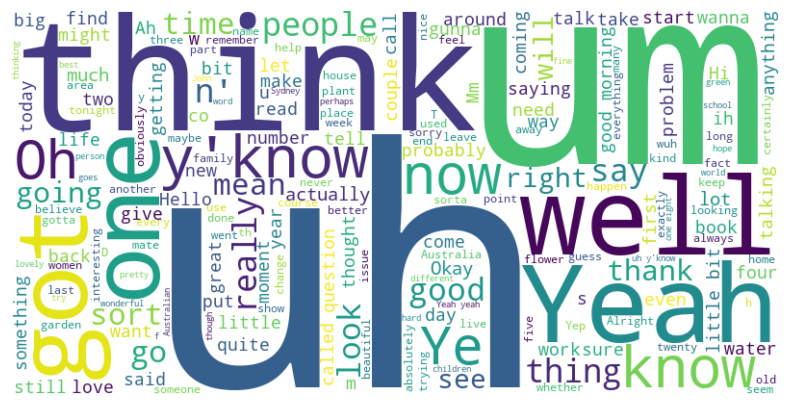

In [15]:
# Combine all text into a single string
all_text = ' '.join(df['text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


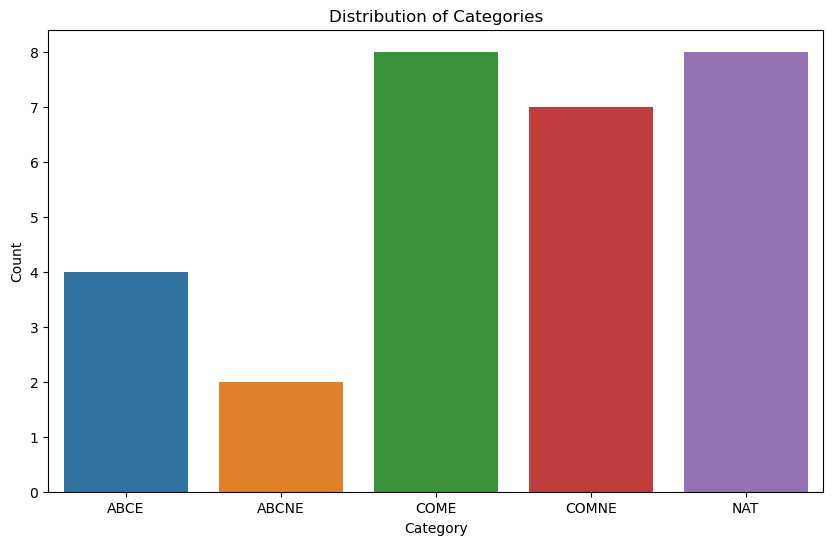

In [16]:
# category distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df)
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


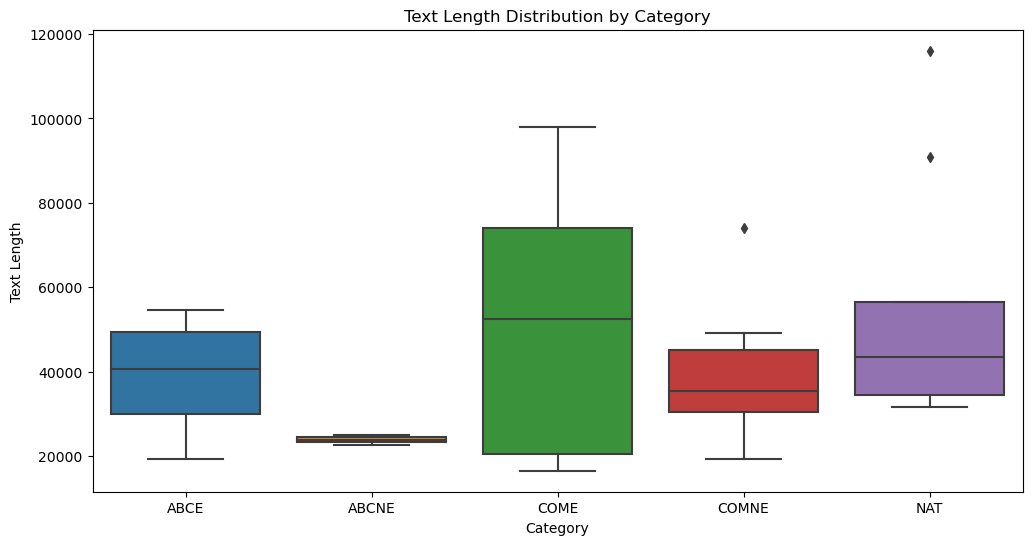

In [17]:
# Text length analysis 
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='text_length', data=df)
plt.title('Text Length Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Text Length')
plt.show()


###  Word freq by category 

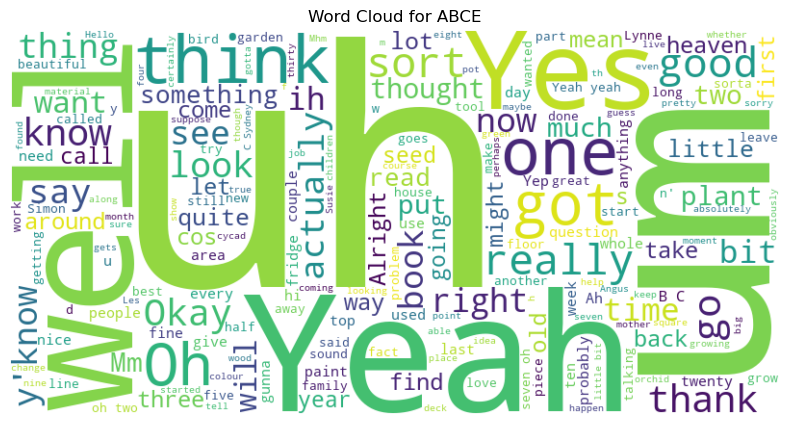

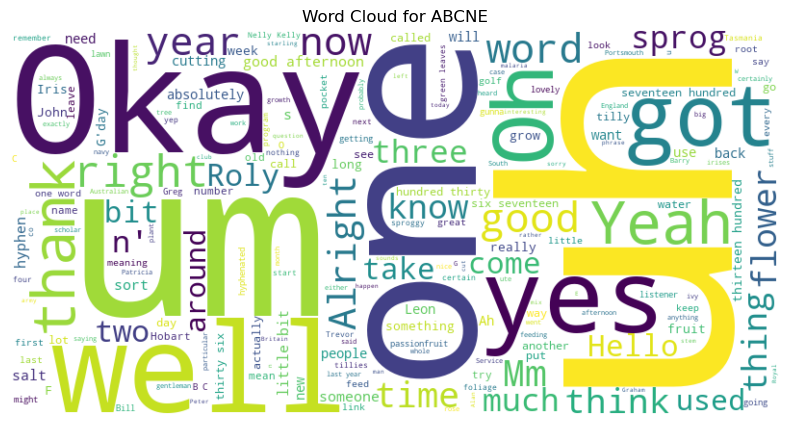

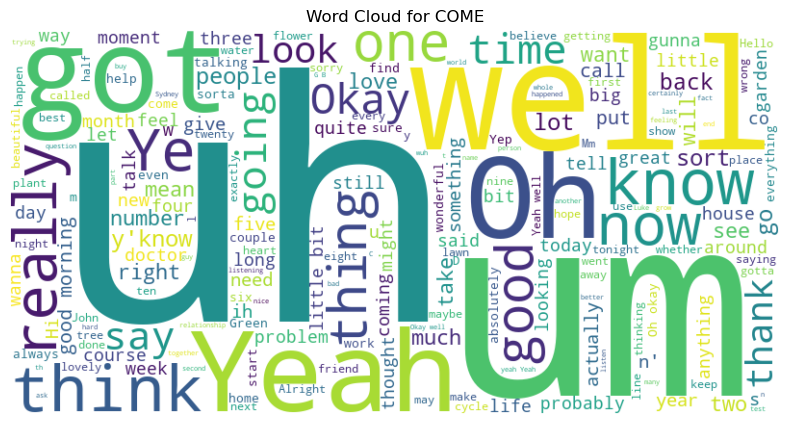

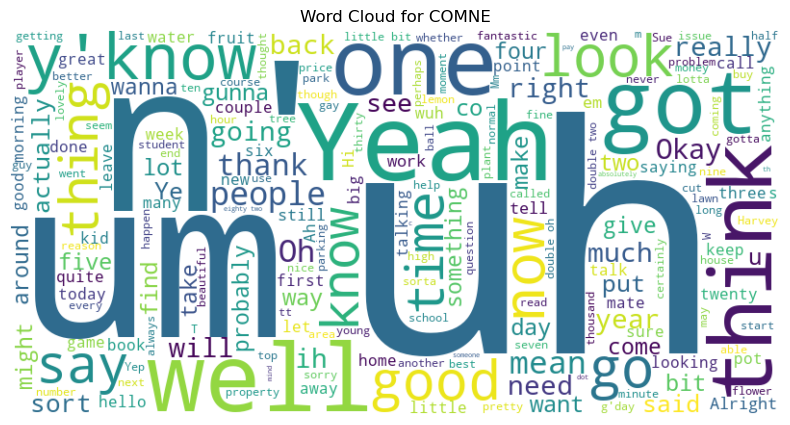

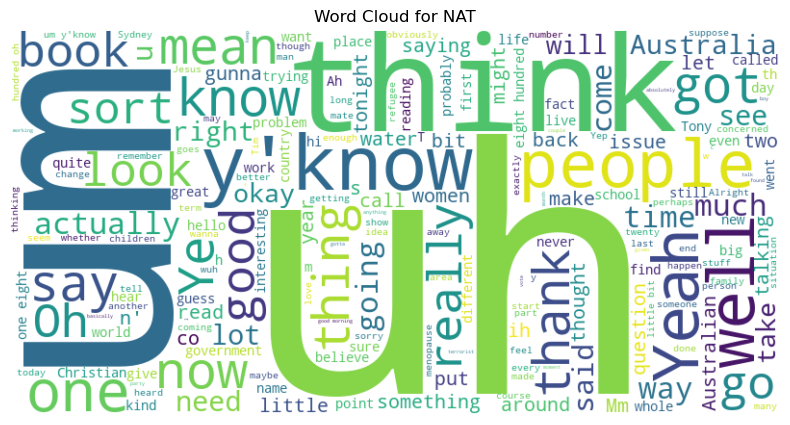

In [18]:
categories = df['category'].unique()

for category in categories:
    category_text = ' '.join(df[df['category'] == category]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(category_text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {category}')
    plt.axis('off')
    plt.show()


## Tokenization 

In [20]:
from nltk.tokenize import word_tokenize

# Tokenize the text in each row and store it in the 'tokens' column
df['tokens'] = df['text'].apply(word_tokenize)

# Checking the column is created
print(df.columns)


Index(['filename', 'category', 'text', 'text_length', 'tokens'], dtype='object')


In [21]:
from nltk import ngrams
from collections import Counter

def generate_ngrams(text, n):
    tokens = nltk.word_tokenize(text)
    n_grams = list(ngrams(tokens, n))
    return n_grams

# Generate bigrams and trigrams for each category
for category in categories:
    category_text = ' '.join(df[df['category'] == category]['text'])
    bigrams = generate_ngrams(category_text, 2)
    trigrams = generate_ngrams(category_text, 3)
    
    bigram_freq = Counter(bigrams)
    trigram_freq = Counter(trigrams)
    
    print(f"\nTop 10 Bigrams for {category}:")
    print(bigram_freq.most_common(10))
    
    print(f"\nTop 10 Trigrams for {category}:")
    print(trigram_freq.most_common(10))



Top 10 Bigrams for ABCE:
[(('it', "'s"), 293), (('.', 'Yeah'), 132), (('.', 'And'), 129), (('.', 'I'), 125), (('of', 'the'), 115), (('that', "'s"), 106), (('it', '.'), 102), (('.', 'Yes'), 99), (('in', 'the'), 97), (("'s", 'a'), 93)]

Top 10 Trigrams for ABCE:
[(('.', 'Yeah', '.'), 45), (('.', 'That', "'s"), 40), (('.', 'It', "'s"), 40), (('it', "'s", 'a'), 37), (('I', 'do', "n't"), 33), (('.', 'Yes', '.'), 32), (('.', 'Mm', '.'), 27), (('A', 'B', 'C'), 27), (('and', 'it', "'s"), 25), (('it', "'s", 'not'), 23)]

Top 10 Bigrams for ABCNE:
[(('in', 'the'), 44), (('that', "'s"), 37), (('of', 'the'), 36), (('.', 'Okay'), 36), (('it', "'s"), 35), (('.', 'I'), 34), (('do', "n't"), 32), (('.', 'Oh'), 32), (('.', 'Uh'), 31), (("'n", "'"), 26)]

Top 10 Trigrams for ABCNE:
[(('a', 'little', 'bit'), 13), (('.', 'Okay', '.'), 12), (('.', 'Thank', 'you'), 12), (('.', 'Yes', '.'), 11), (('.', 'That', "'s"), 10), (('.', 'It', "'s"), 10), (('.', 'Mm', '.'), 9), (('you', "'ve", 'got'), 9), (('I', "'ve

In [22]:
print(df.columns)


Index(['filename', 'category', 'text', 'text_length', 'tokens'], dtype='object')


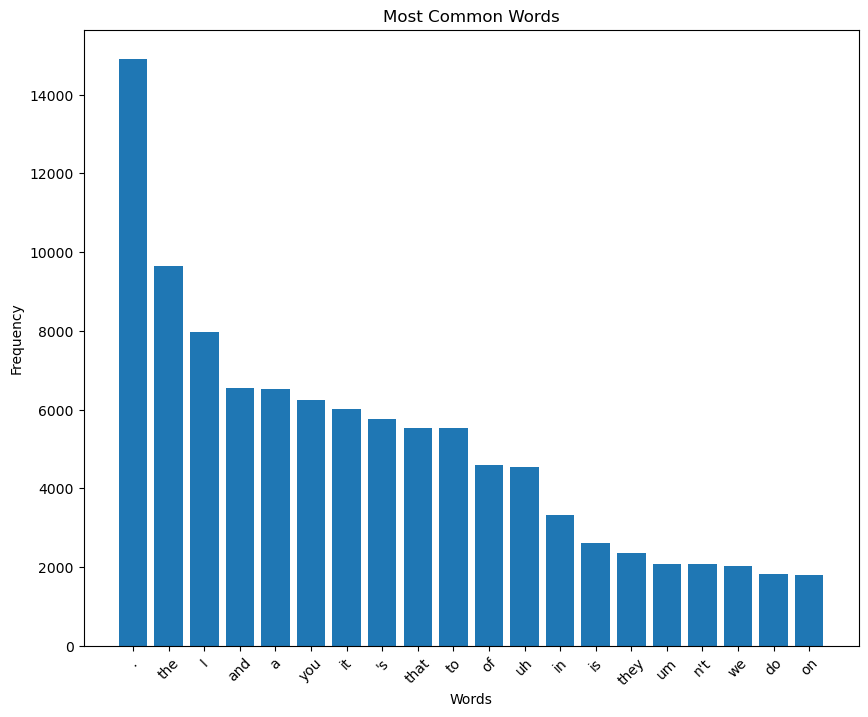

In [23]:
from collections import Counter
import matplotlib.pyplot as plt

all_tokens = [token for sublist in df['tokens'] for token in sublist]
freq = Counter(all_tokens)

# Plotting the most common words
common_words = freq.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(10, 8))
plt.bar(words, counts)
plt.title('Most Common Words')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


In [24]:
print(df.columns)


Index(['filename', 'category', 'text', 'text_length', 'tokens'], dtype='object')


In [25]:
from collections import Counter
import pandas as pd

# Combine all tokens into a single list
all_tokens = [token for sublist in df['tokens'] for token in sublist]

# Count frequency of each token
token_freq = Counter(all_tokens)

# Convert to DataFrame for easier handling
freq_df = pd.DataFrame(token_freq.items(), columns=['Token', 'Frequency'])
freq_df = freq_df.sort_values(by='Frequency', ascending=False)

print(freq_df.head(20))  # Print the top 20 most frequent tokens


    Token  Frequency
47      .      14901
9     the       9642
37      I       7976
35    and       6548
32      a       6521
28    you       6243
103    it       6005
26     's       5760
2    that       5546
17     to       5538
54     of       4603
299    uh       4543
24     in       3313
15     is       2618
146  they       2360
195    um       2083
218   n't       2070
79     we       2018
286    do       1838
90     on       1807


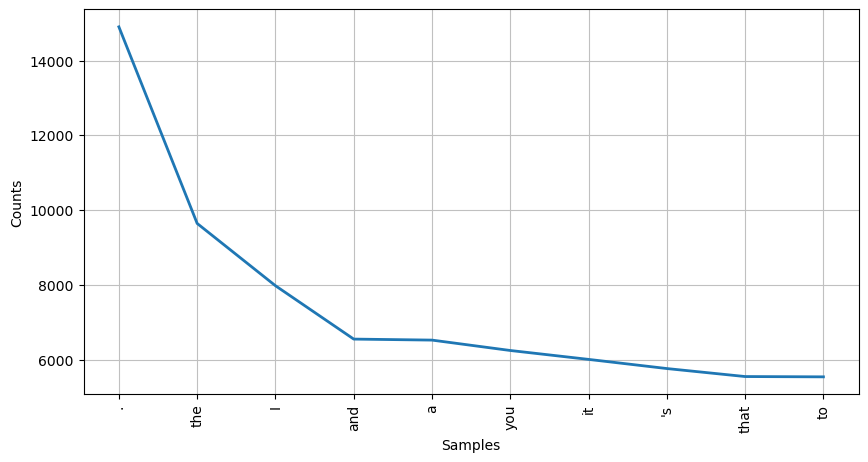

In [26]:
from nltk.probability import FreqDist
# Compute frequency distribution
com_words = FreqDist(all_tokens)

# Plot the 10 most common words
plt.figure(figsize=(10, 5))
com_words.plot(10)
plt.show()

## Data Preparation /  Pre-processing Pipeline

In [27]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # Ensure this is downloaded

def clean_text(text, stop_words, lemmatizer):
    # Normalize text
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Tokenize text
    words = word_tokenize(text)
    # Remove stopwords and non-alphabetic words
    words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

# Update stopwords list with domain-specific terms
custom_stopwords = {'um', 'uh', 'right', 'youknow', 'like', 'just', 'really', 'say', 'said', 'got'}
stop_words = set(stopwords.words('english')).union(custom_stopwords)
lemmatizer = WordNetLemmatizer()


df['cleaned_text'] = df['text'].apply(lambda x: clean_text(x, stop_words, lemmatizer))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### checking after post cleaning 

In [28]:
#'cleaned_text' is the column with preprocessed text
words = [word for sublist in df['cleaned_text'].str.split() for word in sublist]
word_freq = Counter(words)

# Display the most common words to review them
print(word_freq.most_common(20))

[('well', 1622), ('yeah', 1485), ('think', 1210), ('thats', 1202), ('good', 1049), ('yknow', 949), ('oh', 932), ('one', 918), ('im', 900), ('get', 873), ('n', 835), ('yes', 788), ('know', 778), ('dont', 769), ('go', 749), ('people', 714), ('okay', 706), ('thing', 689), ('youre', 679), ('would', 647)]


In [29]:
# Expanding the custom stopwords
expanded_stopwords = {'well', 'yeah', 'thats', 'yknow', 'oh', 'im', 'get', 'n', 'yes', 'know', 'dont', 'go', 'okay', 'youre', 'would', 'thing', 'people'}

# Update the existing stopword set
stop_words.update(expanded_stopwords)

# Reapply the cleaning process
df['cleaned_text'] = df['text'].apply(lambda x: clean_text(x, stop_words, lemmatizer))

# Checking the new most common words
from collections import Counter
words = [word for sublist in df['cleaned_text'].str.split() for word in sublist]
word_freq = Counter(words)
print(word_freq.most_common(20))


[('think', 1210), ('good', 1049), ('one', 918), ('year', 644), ('time', 598), ('theyre', 595), ('look', 588), ('there', 569), ('ive', 561), ('mean', 509), ('sort', 504), ('going', 493), ('bit', 461), ('much', 440), ('youve', 435), ('little', 417), ('see', 417), ('back', 415), ('actually', 398), ('lot', 389)]


In [30]:
df['cleaned_text'].head()

0    thanks john hall john hall listening next hour...
1    ah look l le pete simon gday peto simo gday le...
2    havent u function jurate sasnaitis join u ever...
3    bluetonguesd unlikely eat good old hemidactylu...
4    good afternoon roly good afternoon sir mm good...
Name: cleaned_text, dtype: object

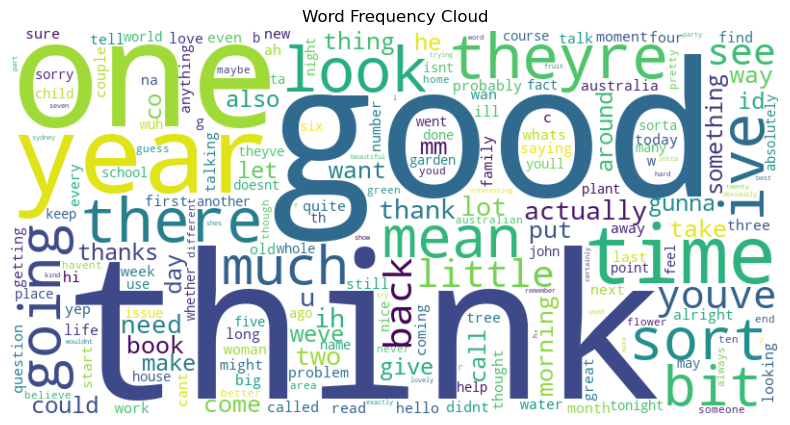

In [31]:
#cleaned_text' is a column in your DataFrame 'df' containing preprocessed text
all_text = ' '.join(df['cleaned_text'])

# Generate word frequency
word_freq = Counter(all_text.split())

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.title('Word Frequency Cloud')
plt.show()

# Topic modelling 

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=stop_words)

try:
    dtm = vectorizer.fit_transform(df['cleaned_text'])
    print(dtm.shape)  # Output the shape of the DTM
except Exception as e:
    print(f"An error occurred: {e}")


An error occurred: The 'stop_words' parameter of TfidfVectorizer must be a str among {'english'}, an instance of 'list' or None. Got {'aren', 'if', 'shan', 'any', 'they', 'was', "shouldn't", 'yourself', "wouldn't", 'mustn', "isn't", 'n', 'below', 'said', 'didn', 'my', 'weren', 'go', 'you', 'through', 'im', "that'll", "haven't", 'by', 'over', 'been', 'from', 'do', 'are', 'than', 'well', 'those', 'youknow', 'it', 'in', "shan't", "don't", 'yourselves', 'or', 'with', 'such', 've', 'whom', 'so', 'um', "you'll", "you'd", 'during', 'm', 'people', 'hers', 'and', 'when', 'i', "she's", "aren't", 'couldn', 'were', 'doesn', 'the', 'same', 'o', "couldn't", "mustn't", 'what', 'once', 'most', 'these', 'themselves', 'how', 'out', 'again', 'wasn', 'our', "needn't", 'only', 'an', 'got', 'him', 'himself', 'is', 'against', 'yknow', 'itself', 'just', "wasn't", 'why', 'yeah', 'would', 'but', 'before', 'like', 'll', 'between', 'ma', 'having', 'each', "won't", 'at', 'under', 'hasn', "weren't", 'did', 'as', 't

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

try:
    dtm = vectorizer.fit_transform(df['cleaned_text'])
    print(dtm.shape)  # Output the shape of the DTM
except Exception as e:
    print(f"An error occurred: {e}")


(29, 4521)


In [34]:
stop_words_list = list(stop_words)  # Convert set to list

vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=stop_words_list)

try:
    dtm = vectorizer.fit_transform(df['cleaned_text'])
    print(dtm.shape)  # Output the shape of the DTM
except Exception as e:
    print(f"An error occurred: {e}")


(29, 4648)


In [35]:
# Check the type of the cleaned_text column
print(df['cleaned_text'].dtype)

# Check the first few entries to ensure they are valid strings
print(df['cleaned_text'].head())


object
0    thanks john hall john hall listening next hour...
1    ah look l le pete simon gday peto simo gday le...
2    havent u function jurate sasnaitis join u ever...
3    bluetonguesd unlikely eat good old hemidactylu...
4    good afternoon roly good afternoon sir mm good...
Name: cleaned_text, dtype: object


In [36]:
sample_df = df['cleaned_text'].head(10)  # Take a small sample of the data

vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

try:
    dtm = vectorizer.fit_transform(sample_df)
    print(dtm.shape)  # Output the shape of the DTM
except Exception as e:
    print(f"An error occurred: {e}")


(10, 1989)


In [49]:
from sklearn.decomposition import LatentDirichletAllocation

# Set the number of topics
num_topics = 5  # Adjust based on analysis

# Initialize and fit the LDA model
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

# Display the topics
for index, topic in enumerate(lda.components_):
    print(f"Topic {index + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic 1:
['today', 'property', 'queensland', 'seed', 'morning', 'house', 'bird', 'tree', 'garden', 'plant']
Topic 2:
['graham', 'bone', 'golf', 'blood', 'salt', 'doctor', 'used', 'morning', 'dr', 'word']
Topic 3:
['person', 'difficult', 'remember', 'wanted', 'place', 'talkback', 'gday', 'trevor', 'case', 'came']
Topic 4:
['person', 'difficult', 'remember', 'wanted', 'place', 'talkback', 'gday', 'trevor', 'case', 'came']
Topic 5:
['id', 'flower', 'didnt', 'heaven', 'iris', 'green', 'paint', 'john', 'book', 'read']


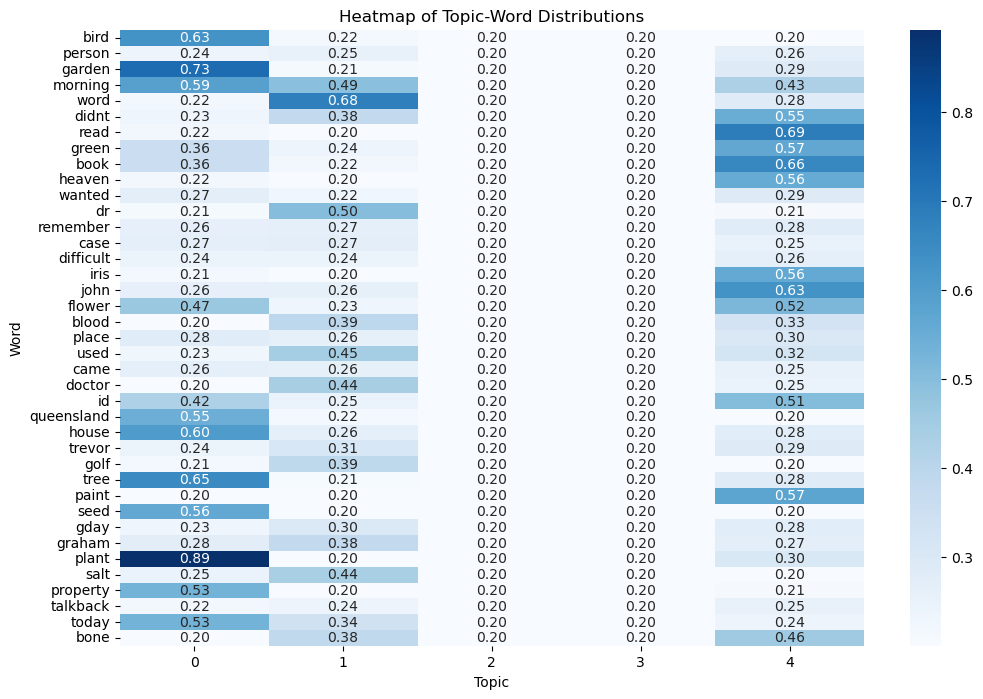

In [68]:
import seaborn as sns
import pandas as pd

# Convert the LDA topics into a DataFrame
topic_word_distributions = pd.DataFrame(lda.components_, columns=vectorizer.get_feature_names_out())

# Select the top words for better visualization
top_n_words = topic_word_distributions.apply(lambda x: x.nlargest(10).index.tolist(), axis=1).tolist()
top_n_words = list(set([word for sublist in top_n_words for word in sublist]))

# Subset DataFrame for the selected top words
heatmap_data = topic_word_distributions[top_n_words]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data.T, cmap='Blues', annot=True, fmt=".2f")
plt.title("Heatmap of Topic-Word Distributions")
plt.xlabel("Topic")
plt.ylabel("Word")
plt.show()


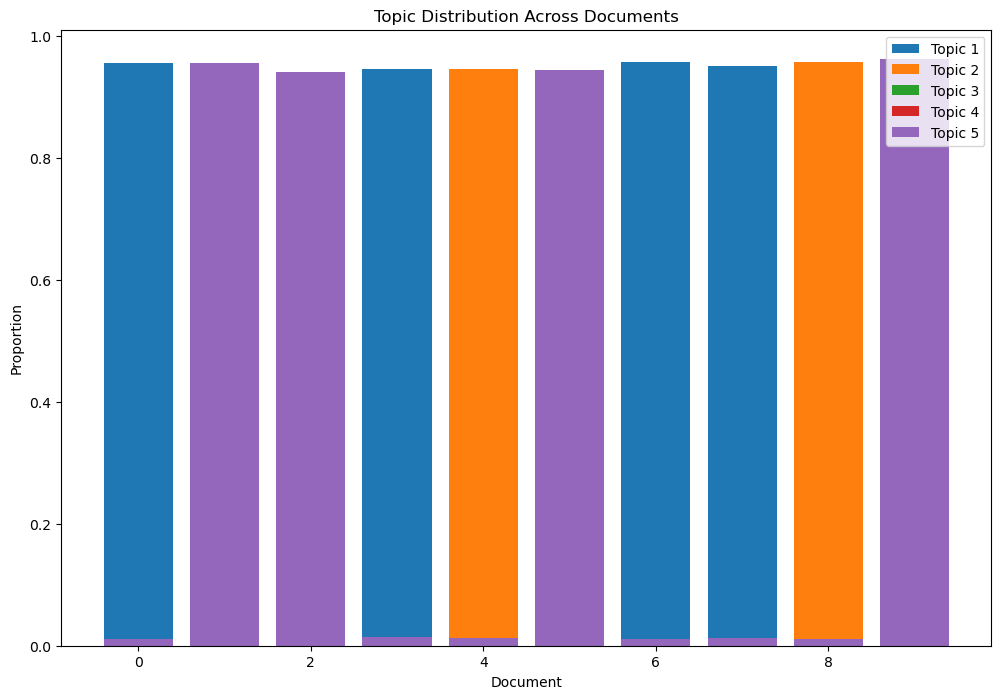

In [69]:
# Get topic distributions for each document
doc_topic_distributions = lda.transform(dtm)

# Plotting the topic distribution for each document
plt.figure(figsize=(12, 8))
for i in range(num_topics):
    plt.bar(range(len(doc_topic_distributions)), doc_topic_distributions[:, i], label=f'Topic {i+1}')
plt.title("Topic Distribution Across Documents")
plt.xlabel("Document")
plt.ylabel("Proportion")
plt.legend()
plt.show()


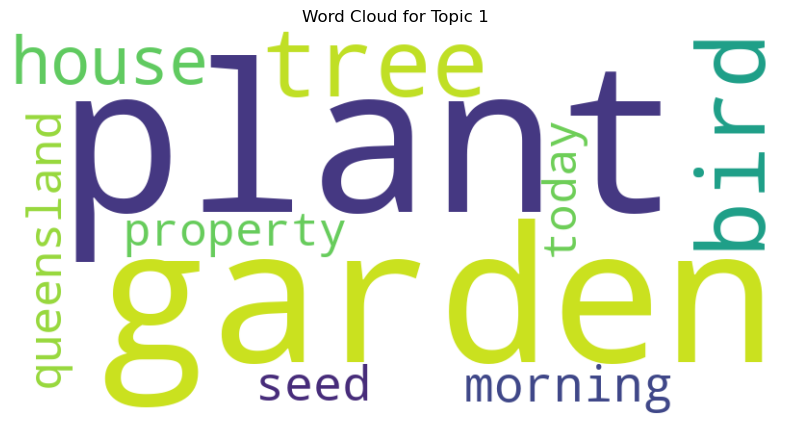

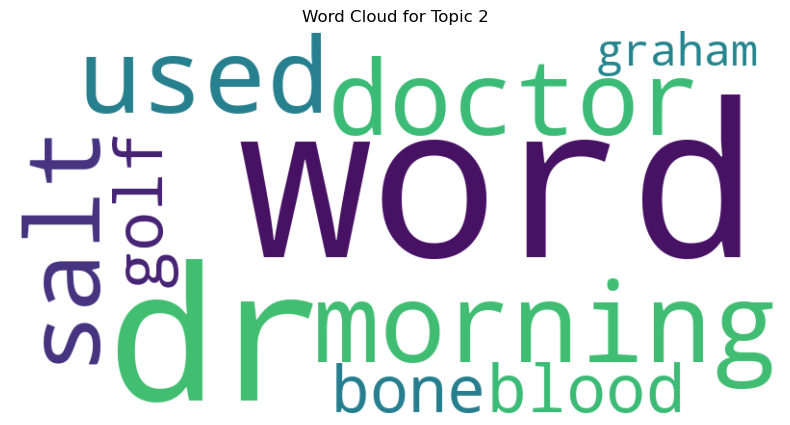

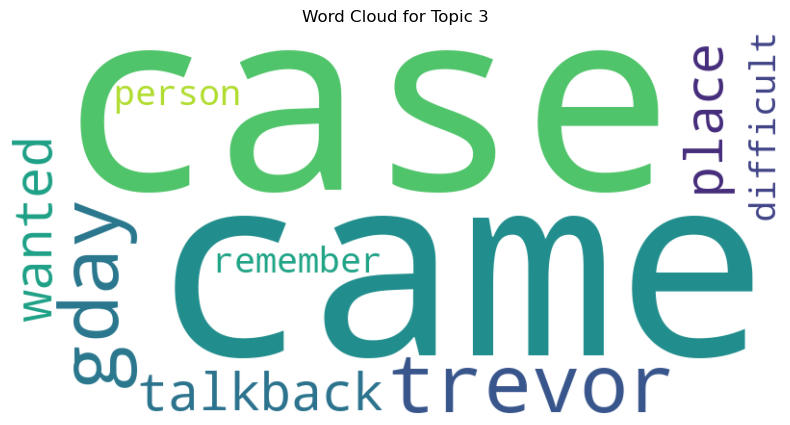

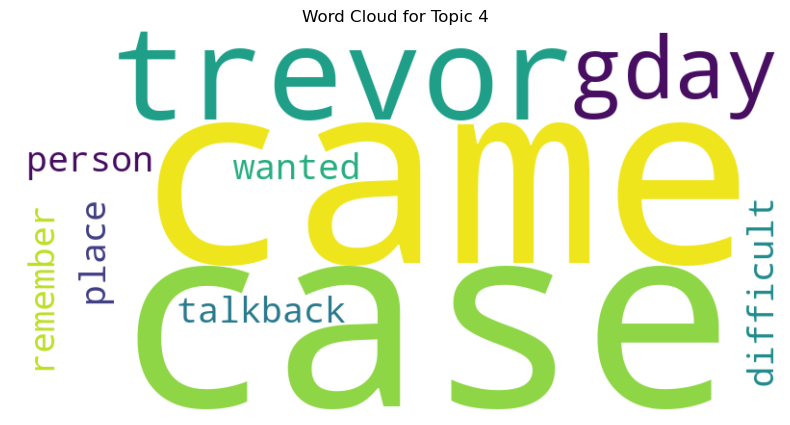

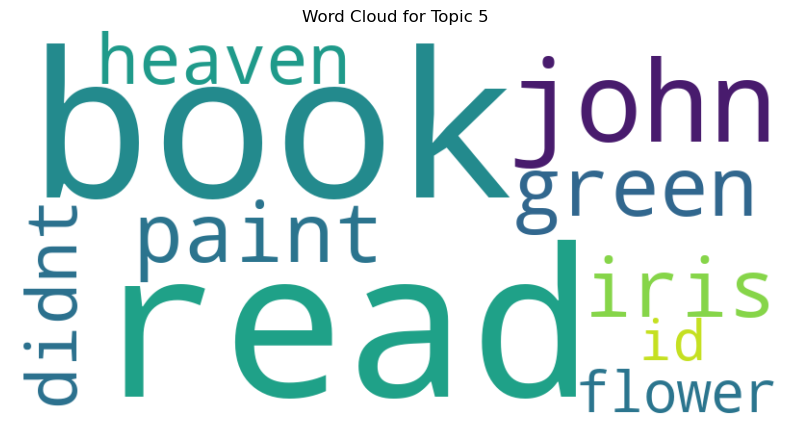

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Number of words to display in the word cloud
n_words = 10

# Plotting word clouds for each topic
for index, topic in enumerate(lda.components_):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
        {vectorizer.get_feature_names_out()[i]: topic[i] for i in topic.argsort()[-n_words:]}
    )
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Topic {index + 1}")
    plt.show()


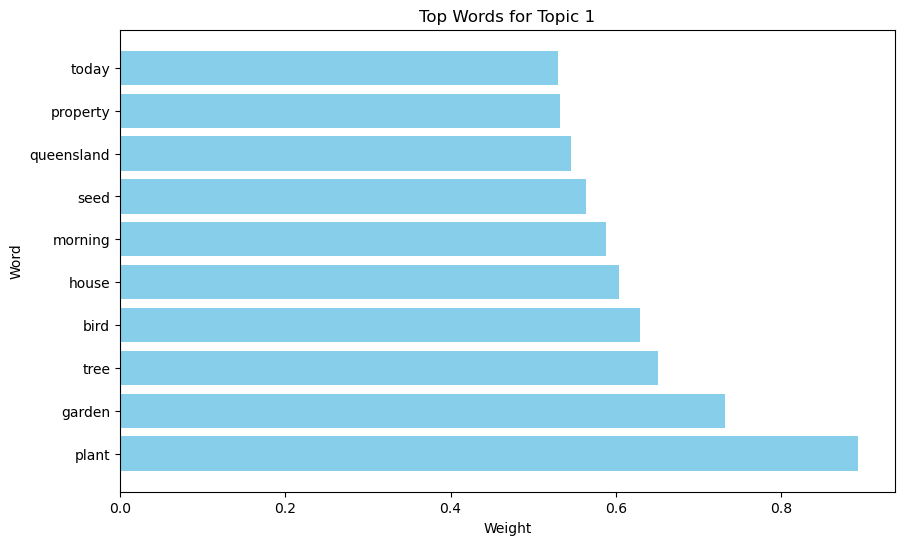

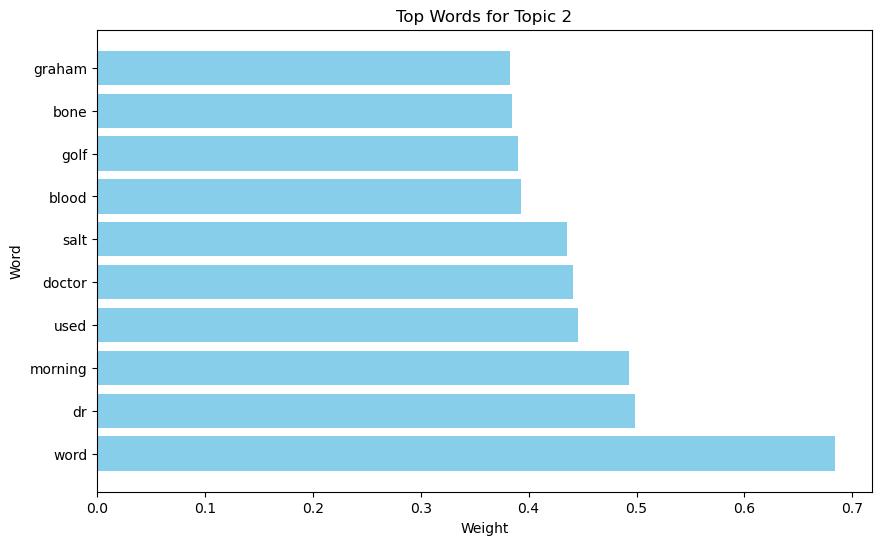

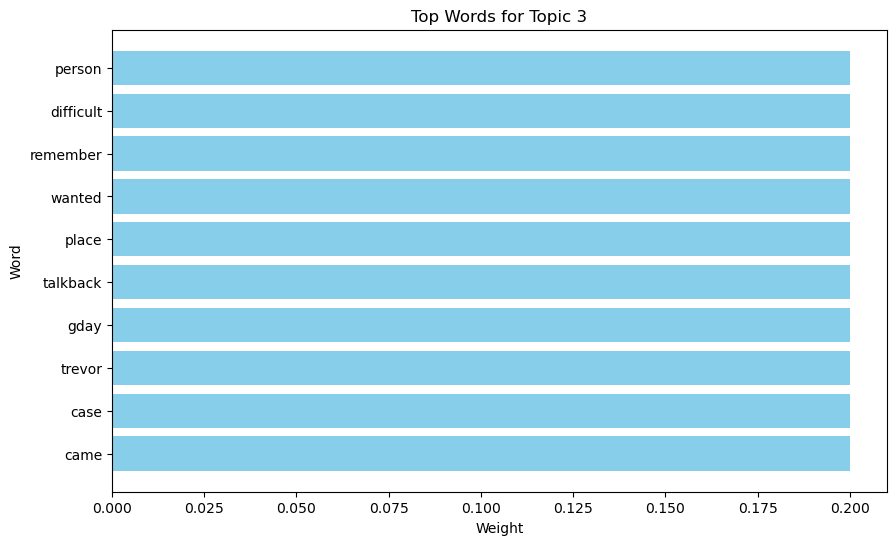

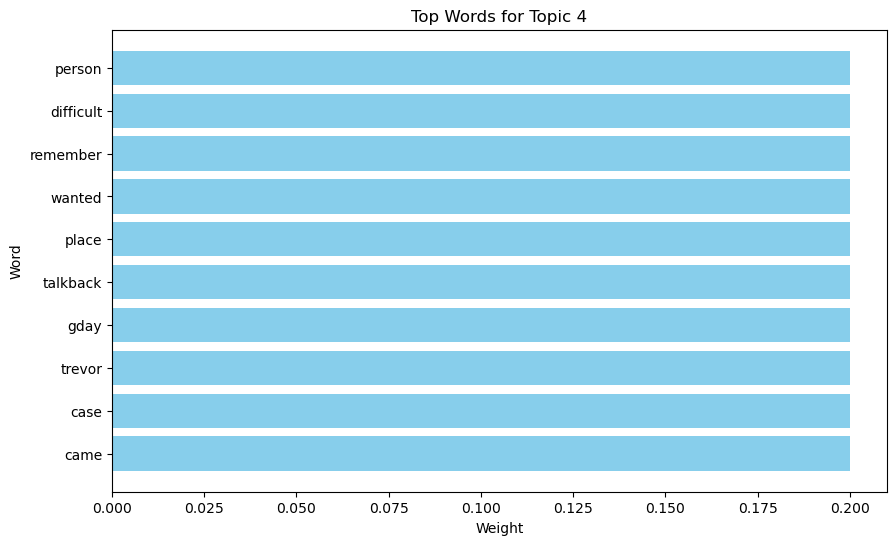

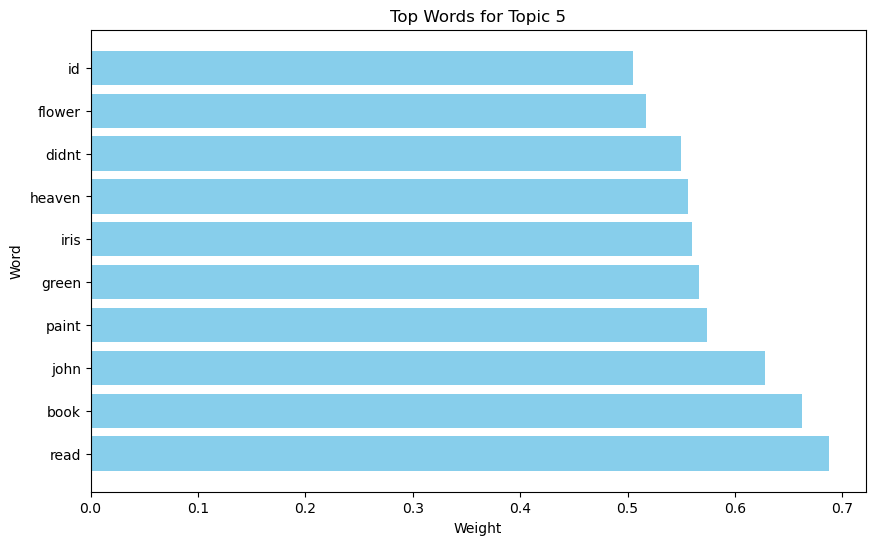

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Number of words to display per topic
n_top_words = 10

# Plotting bar charts for each topic
for index, topic in enumerate(lda.components_):
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-n_top_words:]]
    top_weights = topic[topic.argsort()[-n_top_words:]]
    
    plt.figure(figsize=(10, 6))
    plt.barh(top_words, top_weights, color='skyblue')
    plt.title(f"Top Words for Topic {index + 1}")
    plt.xlabel('Weight')
    plt.ylabel('Word')
    plt.gca().invert_yaxis()  # Highest weight at the top
    plt.show()
